# Weighted Cutflow

**Goal:** Print out the cutflow for the analysis with different physics samples.

For comparison with the internal note results, I want to have the flexibility to put the trigger at the beginning or end of the analysis chain.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import uproot

import os
import sys
sys.path.append("../code")
from analysis import read_tsv, fileDir, yr_short, triggers
from plotting import varEvolution, massPlane

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Ok, so I think mostly I want the functionality to run over different physics samples with the triggers from the different years.

In [4]:
btags = '4b'
physicsSample = 'SMNR'
prodTag = 'AUG2019'

triggerFirst = True
trigger = '2016_triggers'

In [24]:
year = int(trigger[:4])

if 'data' in physicsSample:
    subDir = physicsSample
else: 
    if 'triggers' in trigger:
        subDir = f'{physicsSample}_mc16a_PFlow-{prodTag}'
    else:
        pass
#         for year in [2015,2016]:
#             if trigger in triggers[year]:
#                 subDir = f'{physicsSample}_mc16a_PFlow_{}'.format(physicsSample,yr_short[year])
                
#figDir = "../figures/{}{}/{}".format("2b_" if btags == '2b' else '', subDir,trigger if triggerFirst else 'noTriggers' if physicsSample == 'SMNR' else 'allTriggers')
 
figDir = f"../figures/{subDir}"



In [14]:
fDir = f"../data/{subDir}/"

fs = {15 : 0.22, 16 : 0.16}

if physicsSample == 'SMNR':
    
    c_evt = 'C4'
    title = "{} SM NR".format(btags)
    fName = "files/df_f_0.22_00*.h5"
    
elif 'data' in physicsSample:
    
    c_evt = 'k'

    yr_tag = int(physicsSample[-2:])
    title = "{} data 20{}".format(btags,yr_tag)
    
    f = fs[yr_tag]
    fName = "files/df_period?_f_{}_00*.h5".format(f)
    
else:
    print("Error: Don't have functionality to run over",subDir)

In [15]:
fDir

'../data/SMNR_mc16a_PFlow-AUG2019/'

In [16]:
myFiles = fDir + fName
dfs = []
    
cols = ["2015_triggers",
        "HLT_2j35_btight_2j35_L14J15.0ETA25",
        "HLT_j100_2j55_bmedium",
        "HLT_j225_bloose",
        "2016_triggers",
        "HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25",
        "HLT_j100_2j55_bmv2c2060_split",
        "HLT_j225_bmv2c2060_split",
        'mcEventWeight', 'nbtags',
        'fourGoodJets', 'MDR', 'MDpT', 'cut_deta_hh', 'cut_Xwt', 'cut_Xhh',
        'mc_sf','nValidPairs']
    
for i, myFile in enumerate(glob(myFiles)):

    print('{}. {}'.format(i+1,myFile))
    
    try:
        df = pd.read_hdf(myFile,key='df')
    except OSError:
        print('ERROR could not read file... SKIPPING.')
    # Note: I need the trigger array separate so that I could load everything into memory
    dfs.append(df[cols])
    
miniNtuple = pd.concat(dfs)

1. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_660000_665000.h5
2. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_70000_75000.h5
3. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_55000_60000.h5
4. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_475000_480000.h5
5. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_290000_295000.h5
6. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_435000_440000.h5
7. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_235000_240000.h5
8. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_565000_570000.h5
9. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_445000_450000.h5
10. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_75000_80000.h5
11. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_590000_595000.h5
12. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_380000_385000.h5
13. ../data/SMNR_mc

101. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_410000_415000.h5
102. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_285000_290000.h5
103. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_605000_610000.h5
104. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_315000_320000.h5
105. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_205000_210000.h5
106. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_470000_475000.h5
107. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_10000_15000.h5
108. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_550000_555000.h5
109. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_635000_640000.h5
110. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_600000_605000.h5
111. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_395000_400000.h5
112. ../data/SMNR_mc16a_PFlow-AUG2019/files/df_f_0.22_000001_entry_100000_1050

In [18]:
sum_weights_initial = 0
treeName = "MetaData_EventCount_XhhMiniNtuple"

for myFile in glob(fileDir[subDir] + "user.*.MiniNTuple.root"):
    #print(myFile)
    metadata = uproot.open(myFile)[treeName]
    sum_weights_initial += metadata.allvalues[3]

print("sum_weights_initial",sum_weights_initial)

sum_weights_initial 26458.627422725625


In [19]:
btags

'4b'

In [20]:
x = ['4 jets $p_T > 40$ GeV, $|\eta| < 2.5$: {}-tags'.format(btags),
     'MD $\Delta R_{jj}$', 'MD $p_T(h)$s',
     '$|\Delta \eta_{hh}| < 1.5$','$X_{wt} > 1.5$',
     '$X_{hh}$ < 1.6']
    
base_masks = [miniNtuple.fourGoodJets, miniNtuple.MDR, 
              miniNtuple.MDpT, miniNtuple.cut_deta_hh,
              miniNtuple.cut_Xwt, miniNtuple.cut_Xhh]

if btags == '4b':
    bmask = (miniNtuple.nbtags >= 4)
elif btags == '2b':
    bmask = (miniNtuple.nbtags == 2)
else:
    print("Error: Don't have functionality to run over the {} option for btags".format(btags))
base_masks = [mi & bmask for mi in base_masks]

if triggerFirst:
    cf_masks = [miniNtuple[trigger]] + [mi & miniNtuple[trigger] for mi in base_masks]
    x = [trigger] + x
else:
    cf_masks = base_masks + [miniNtuple.cut_Xhh & miniNtuple[trigger]]
    x = x + [trigger]
    
# Then also look at the impact of XhhCommon on the events 
miniNtuple['miniNtuple'] = True
cf_masks = [miniNtuple.miniNtuple] + cf_masks
x = ['XhhCommon'] + x

counts = [miniNtuple.loc[mask,'mcEventWeight'].sum() / sum_weights_initial for mask in cf_masks]

In [25]:
plt.figure()
doLog = ('data' in subDir)
plt.bar(x,counts,width=1,alpha=0.5,color=c_evt,log=doLog)
plt.xticks(x,x,rotation=80,fontsize=12)
plt.ylabel('Acceptance x Efficiency')
plt.title(title)
plt.savefig(f'{figDir}/weighted_cutflow.pdf',bbox_inches='tight')
plt.show()

In [22]:
cutflow = pd.DataFrame(counts,x,columns=['Acceptance x efficiency'])

y = [counts[0]] + list(np.array(counts[1:]) / np.array(counts[:-1]))
cutflow['Relative efficiency'] = y

cutflow.round(3)

Acceptance x efficiency  \
XhhCommon                                                         0.618   
2016_triggers                                                     0.408   
4 jets $p_T > 40$ GeV, $|\eta| < 2.5$: 4b-tags                    0.044   
MD $\Delta R_{jj}$                                                0.040   
MD $p_T(h)$s                                                      0.038   
$|\Delta \eta_{hh}| < 1.5$                                        0.034   
$X_{wt} > 1.5$                                                    0.031   
$X_{hh}$ < 1.6                                                    0.016   

                                                Relative efficiency  
XhhCommon                                                     0.618  
2016_triggers                                                 0.660  
4 jets $p_T > 40$ GeV, $|\eta| < 2.5$: 4b-tags                0.109  
MD $\Delta R_{jj}$                                            0.897  
MD $p_T(h)$s                                                  0.944  
$|\Delta \eta_{hh}| < 1.5$                                    0.905  
$X_{wt} > 1.5$                                                0.912  
$X_{hh}$ < 1.6                                                0.522

## Trigger efficiencies

Since I have the whole df loaded in at this point, I think it might be useful to see how the efficiency is split between our three trigger streams.

In [27]:
labels = [trigger] + triggers[year]
colors = ['k','lime','b','r']

In [28]:
cols = [title]
trig_df = pd.DataFrame(0,index=labels,columns=cols)

for ti in labels:

    # Add in the new trigger efficiency for this nb confguration
    trig_df.loc[ti,title] = miniNtuple.loc[miniNtuple[ti],'mcEventWeight'].sum() / sum_weights_initial

trig_df

4b SM NR
2016_triggers                                0.410864
HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25  0.349986
HLT_j100_2j55_bmv2c2060_split                0.266808
HLT_j225_bmv2c2060_split                     0.066461

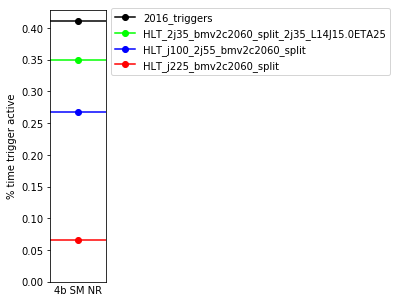

In [29]:
if triggerFirst:
    
    plt.figure(figsize=(1,5))

    for eff,l,c in zip(trig_df[title],labels,colors):
        #print(eff)
        plt.plot([-0.1,0.5,1.1],[eff]*3,color=c,linestyle='-',marker='o', label=l)

    ax = plt.gca()
    ax.set_xticks([])
    ax.set_xticklabels([])
    plt.xlim(0,1)

    _, ymax = plt.ylim()
    plt.ylim(0,ymax)

    plt.xlabel(title)
    plt.ylabel('% time trigger active')
    plt.legend(loc='upper left',bbox_to_anchor=(1,1.025))

    plt.savefig('{}/individualTriggerEffs.pdf'.format(figDir),bbox_inches='tight')

    plt.show()

In [30]:
rel_effs = trig_df[title] / trig_df.loc[trigger,title]

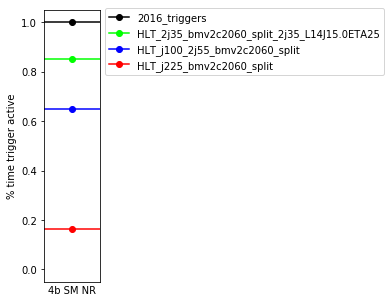

In [31]:
if triggerFirst:

    plt.figure(figsize=(1,5))

    for eff,l,c in zip(rel_effs.values,labels,colors):
        #print(eff)
        plt.plot([-0.1,0.5,1.1],[eff]*3,color=c,linestyle='-',marker='o', label=l)

    ax = plt.gca()
    ax.set_xticks([])
    ax.set_xticklabels([])
    plt.xlim(0,1)
    plt.xlabel(title)
    plt.ylabel('% time trigger active')
    plt.ylim(-0.05,1.05)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1.025))

    plt.savefig('{}/relTriggerEffs.pdf'.format(figDir),bbox_inches='tight')

    plt.show()

**Note:** The last iteration of the analysis always reported the trigger efficiencies relative to the end of the analysis, and we have this intuition that our anlaysis selection selects events that are easier to trigger on, so I might make a quick plot to show 

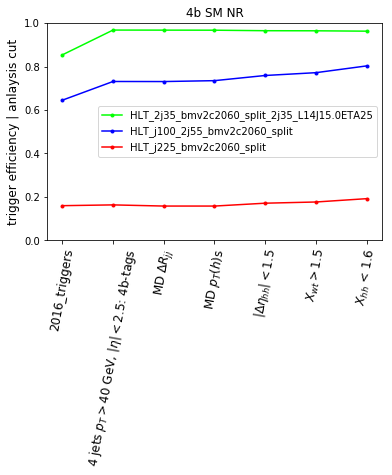

In [32]:
xi = range(len(x)-1)

for ti,c in zip(labels[1:],colors[1:]):
    
    triggerCts = [np.sum(miniNtuple.loc[m & miniNtuple[ti],'mc_sf']) / np.sum(miniNtuple.loc[m,'mc_sf']) for m in cf_masks[1:]]
    
    plt.plot(xi,triggerCts,color=c,marker='.',label=ti)

plt.xticks(xi,x[1:],rotation=80,fontsize=12)
plt.ylim(0,1)
plt.title(title)
plt.legend()

plt.ylabel('trigger efficiency | anlaysis cut',fontsize=12)

plt.savefig('{}/individualTriggerCutflow.pdf'.format(figDir),bbox_inches='tight')

plt.show()
    

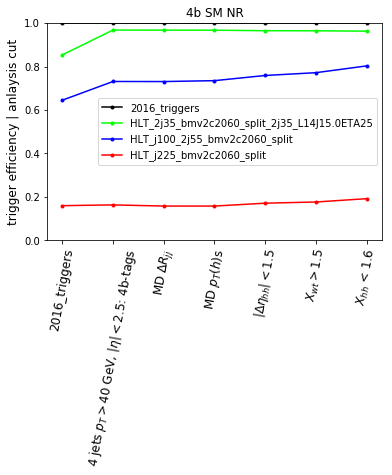

In [33]:
xi = range(len(x[1:]))

for ti,c in zip(labels,colors):
    
    triggerCts = [np.sum(miniNtuple.loc[m & miniNtuple[ti],'mc_sf']) / np.sum(miniNtuple.loc[m,'mc_sf']) for m in cf_masks[1:]]
    
    plt.plot(xi,triggerCts,color=c,marker='.',label=ti)

plt.xticks(xi,x[1:],rotation=80,fontsize=12)
plt.ylim(0,1)
plt.title(title)
plt.legend()

plt.ylabel('trigger efficiency | anlaysis cut',fontsize=12)

plt.savefig('{}/individualTriggerCutflow_withOR.pdf'.format(figDir),bbox_inches='tight')

plt.show()
    

After the MDR cuts, we can see that the lowest threshold trigger is the most efficient, so it would be interesting to see how these trigger streams break down by the number of valid pairings at this snapshot of the analysis as well!

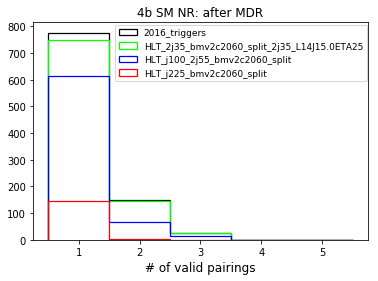

In [34]:
if triggerFirst:
    
    for ti, c in zip(labels,colors):

        mask = bmask & miniNtuple.MDR & miniNtuple[ti]

        plt.hist(miniNtuple.nValidPairs[mask],5,(0.5,5.5),
                 weights=miniNtuple.mc_sf[mask], histtype='step',
                 label=ti,color=c,linewidth=1.25,)

    plt.xlabel('# of valid pairings',fontsize=12)
    plt.title(title+": after MDR")
    plt.legend(loc='upper right',bbox_to_anchor=(1.01,1.01),fontsize=9)

    plt.savefig('{}/MDR_validPairings_separateTriggers.pdf'.format(figDir))
    plt.show()